# Wstęp do uczenia maszynowego
##  Praca domowa nr 1
#### Jakub Piwko, Malwina Wojewoda

#### Pakiety

In [132]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, show

#### Dane i ich opis

In [81]:
credit_df = pd.read_csv('german_credit_data_dataset.csv')
credit_df.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2


In [82]:
pd.set_option('display.max_colwidth', -1)
descr = pd.read_csv('attributes_german_credit_data.csv')
descr

,name,type,description
0,checking_account_status,string,"Status of existing checking account (A11: < 0 DM, A12: 0 <= x < 200 DM, A13 : >= 200 DM / salary assignments for at least 1 year, A14 : no checking account)"
1,duration,integer,Duration in month
2,credit_history,string,"A30: no credits taken/ all credits paid back duly, A31: all credits at this bank paid back duly, A32: existing credits paid back duly till now, A33: delay in paying off in the past, A34 : critical account/ other credits existing (not at this bank)"
3,purpose,string,"Purpose of Credit (A40 : car (new), A41 : car (used), A42 : furniture/equipment, A43 : radio/television, A44 : domestic appliances, A45 : repairs, A46 : education, A47 : (vacation - does not exist?), A48 : retraining, A49 : business, A410 : others)"
4,credit_amount,float,NaN
5,savings,string,"Savings in accounts/bonds (A61 : < 100 DM, A62 : 100 <= x < 500 DM, A63 : 500 <= x < 1000 DM, A64 : >= 1000 DM, A65 : unknown/ no savings account"
6,present_employment,string,"A71 : unemployed, A72 : < 1 year, A73 : 1 <= x < 4 years, A74 : 4 <= x < 7 years, A75 : .. >= 7 years"
7,installment_rate,float,Installment Rate in percentage of disposable income
8,personal,string,"Personal Marital Status and Sex (A91 : male : divorced/separated, A92 : female : divorced/separated/married, A93 : male : single, A94 : male : married/widowed, A95 : female : single)"
9,other_debtors,string,"A101 : none, A102 : co-applicant, A103 : guarantor"


#### Podział na zbiór treningowy, testowy i walidacyjny

In [83]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
X, X_valid = sklearn.model_selection.train_test_split(
    credit_df,
    test_size=0.30, random_state=100)

#Wyróżnienie zbioru treningowego i testowego
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size=0.30, random_state=100)

#### Weryfikacja proporcji zmiennych kategorycznych

Sprawdzamy, czy rozkłady zmiennych kategorycznych w naszych wydzielonych zbiorach różnią się znacząco.

In [84]:
X_train["savings"].value_counts()/np.shape(X_train)[0]

A61    0.626531
A65    0.183673
A62    0.085714
A63    0.053061
A64    0.051020
Name: savings, dtype: float64

In [85]:
X_test["savings"].value_counts()/np.shape(X_test)[0]

A61    0.580952
A65    0.204762
A62    0.090476
A63    0.080952
A64    0.042857
Name: savings, dtype: float64

In [86]:
X_valid["savings"].value_counts()/np.shape(X_valid)[0]

A61    0.580000
A65    0.166667
A62    0.140000
A63    0.066667
A64    0.046667
Name: savings, dtype: float64

Widać z powyższych danych, że zbiory zostały podzielone tak, że rozkłady danych zostały w ich proporcjonalnie zachowane, a więc nie ma potrzeby wykonywania podziału warstwowego. 

#### Analiza danych

In [87]:
X_train.head(10)

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
322,A11,24,A32,A41,2910.0,A61,A74,2.0,A93,A101,...,A124,34.0,A143,A153,1.0,A174,1,A192,A201,1
973,A11,60,A32,A49,7297.0,A61,A75,4.0,A93,A102,...,A124,36.0,A143,A151,1.0,A173,1,A191,A201,2
453,A14,24,A32,A41,2670.0,A61,A75,4.0,A93,A101,...,A123,35.0,A143,A152,1.0,A174,1,A192,A201,1
313,A12,12,A32,A40,685.0,A61,A74,2.0,A94,A101,...,A123,25.0,A141,A152,1.0,A172,1,A191,A201,2
6,A14,24,A32,A42,2835.0,A63,A75,3.0,A93,A101,...,A122,53.0,A143,A152,1.0,A173,1,A191,A201,1
398,A12,12,A32,A40,1223.0,A61,A75,1.0,A91,A101,...,A121,46.0,A143,A151,2.0,A173,1,A191,A201,2
821,A13,12,A32,A43,3016.0,A61,A73,3.0,A94,A101,...,A123,24.0,A143,A152,1.0,A173,1,A191,A201,1
660,A13,12,A32,A43,1297.0,A61,A73,3.0,A94,A101,...,A121,23.0,A143,A151,1.0,A173,1,A191,A201,1
70,A14,36,A32,A41,8133.0,A61,A73,1.0,A92,A101,...,A122,30.0,A141,A152,1.0,A173,1,A191,A201,1
154,A12,24,A33,A49,6967.0,A62,A74,4.0,A93,A101,...,A123,36.0,A143,A151,1.0,A174,1,A192,A201,1


In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 322 to 585
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  490 non-null    object 
 1   duration                 490 non-null    int64  
 2   credit_history           490 non-null    object 
 3   purpose                  490 non-null    object 
 4   credit_amount            490 non-null    float64
 5   savings                  490 non-null    object 
 6   present_employment       490 non-null    object 
 7   installment_rate         490 non-null    float64
 8   personal                 490 non-null    object 
 9   other_debtors            490 non-null    object 
 10  present_residence        490 non-null    float64
 11  property                 490 non-null    object 
 12  age                      490 non-null    float64
 13  other_installment_plans  490 non-null    object 
 14  housing                 

W ramce danych nie wystąpują wartości None/Null. Z opisu ramki, wiemy, że takowe braki, jeśli występują, są zakodowane odpowiednimi wartościami w kolumnach, więc nie musimy przejmować się uzupełnianiem brakujących wartości. Większość zmiennych jest dyskretna. Można natomiast wyróżnić kolumny "age", "credit_amount" i "duration" jako typowo ciągłe. Na początek przenalizujemy właśnie te zmienne. 

###### Rozkłady zmiennych ciągłych

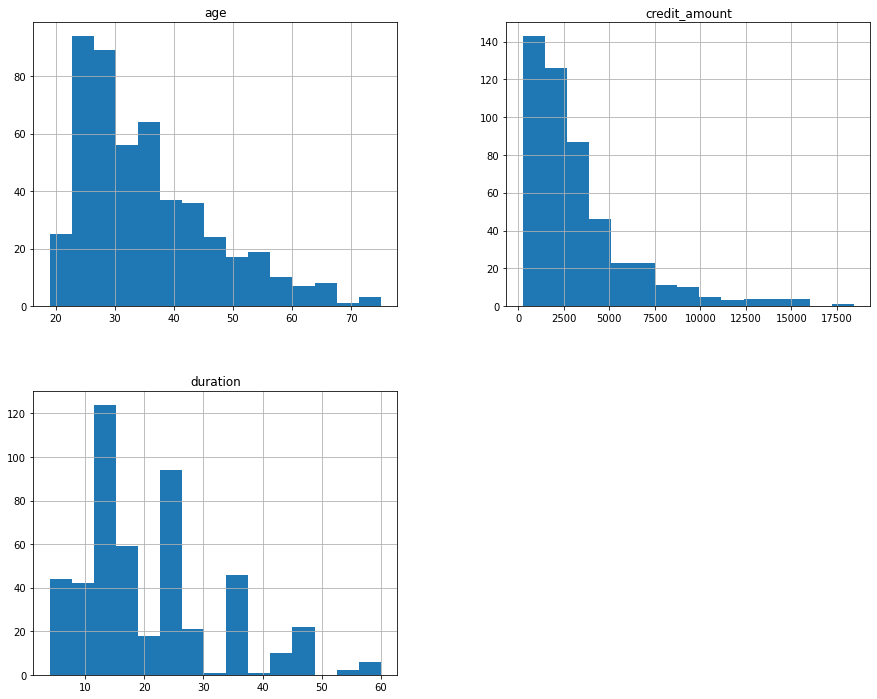

In [89]:
Cont_vars = ["age", "credit_amount", "duration"]
X_train[Cont_vars].hist(bins = 15, figsize = (15,12))
plt.show()

Z wykresy wskazują na to, że rozkłady zmiennych są bardziej prawostronnie skośne. Wśród osób ubiegających się o kredyt występują zdecydowanie częściej osoby młodsze, starające się o mniejszą kwotę kredytu i z krótszym terminem spłaty. Sprawdźmy, czy te zmienne mają wpływ na ocenę kredytobiorcy, badająć zależność ze zmienną "customer_type".

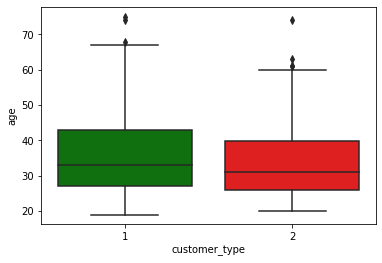

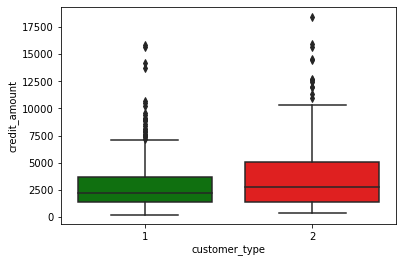

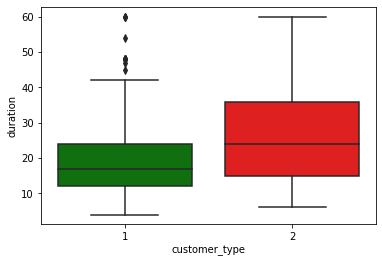

In [90]:
for name in Cont_vars:
    sns.boxplot(y = X_train[name], x = X_train['customer_type'], palette=["green", "red"])
    plt.show()

Wykresy skrzynkowe pokazują, że można wskazać pewne zależności między wskazanymi zmiennymi, a oceną klienta, ale mogą one nie mieć tak dużego znaczenia. Szczególnie pomijalne mogą byc zależności z kolumnami "age" i "credit_amount", która może być bezpośrednio powiązana z zatrudnieniem, historią innych kredytów, posiadanymi nieruchomościami itd. Więcej uwagi mozna poświęcić zmiennej "duration". Intuicyjne jest, że termin spłaty ma znaczenie w ocenie klienta. Widać, że wśród złych klientów rozkład zmiennej "duration" jest przesunięty ku wyższym wartościom. Oznacza to, że lepiej oceniane są osoby, które mogą szybciej spłacić kredyt.

##### Średnia, wartości minimalne itd. 
Warto także sprawdzić jaka jest średnia, odchylenie standardowe, wartość minimalna, maksymalna oraz kwartyle danych w poszczególnych kolumnach.

In [91]:
X_train.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,20.848980,3321.418367,2.879592,2.842857,35.287755,1.424490,1.177551,1.306122
std,11.949692,2935.688618,1.122275,1.089924,11.270464,0.582123,0.382525,0.461352
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1363.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2350.500000,3.000000,3.000000,32.000000,1.000000,1.000000,1.000000
75%,24.000000,3987.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Z powyższej tabeli wynika, że najwięcej kredytów branych jest na około 15-25 miesięcy, jednak są też takie, które znacząco odbiegają od tej wartości.

Jeśli chodzi o wielkość kredytu to najwięcej wartości jest tu w granicach 1500-4000.

Gdy poprównamy jaka część dochodu przeznaczana jestv na spłatę kredytu to nie ma tu wartości odstających. Stanowi to od 1 do 4%, przy czym średnio jest to około 3%.

Podobnie wygląda to w przypadku czasu mieszkania w obecnym miejscu zamieszkania. W tym przypadku także można wywnioskować, że zwykle są to 3 lata.

Średni wiek brania kredytu wynosi około 35 lat i wygląda na to, że 30-latkowie najchętniej biorą kredyty. 

Jeśli chodzi o średnią ilość kredytów, które osoby mają w tym banku to liczba wacha się od 1 do 4, przy czym raczej więcej osób ma tylko jeden.

Liczba poręczycieli zwykle wynosi 1. 

Jest trochę więcej osób, które są postrzegane jako dobry klient.

##### Korelacje
Porównajmy jeszcze korelacje między zmiennymi numerycznymi:

In [92]:
fig_corr = px.imshow(X_train.corr(), color_continuous_scale='Aggrnyl')
fig_corr.show()

Widać, że większość korelacji jest pozytywna. Największa z nich jest między wysokością kredytu a jego długością, co wydaje się logiczne, że im większa kwota jest do spłacenia, tym dłużej będzie spłacana. Jedyną korelacją ujemną jest ta między tym, jaką część przychodu stanowi stawka raty a wielkością kredytu, co wskazuje na to, że dla małych wartości kredytu wysokość raty może być większa. Przyjrzyjmy się najpierw pierwszej z nich. 

##### Wielkość kredytu a jego długość

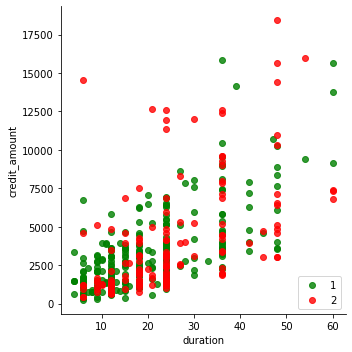

In [107]:
sns.lmplot( x="duration", y="credit_amount", data=X_train, fit_reg=False, hue='customer_type', legend=False, palette=["green", "red"])
plt.legend(loc='lower right')
plt.show()

Powyższy scatterplot pokazuje zależność między najbardziej skorelowanymi wartościami: wysokością kredytu a jego długością dla klientów dobrych oraz złych. Można zauważyć, że w przypadku większego kredytu więcej jest klientów złych niż dobrych. Wydaje się, że średnio najlepsi klienci to tacy, którzy biorą kredyt na krótki okres czasu o niskiej wyskości. 

##### Wielkość kredytu a procent, jaki stanowi stawka raty wobec dochodu
Przejdźmy teraz do zależności między tym, jaką część przychodu stanowi stawka raty a wielkością kredytu.

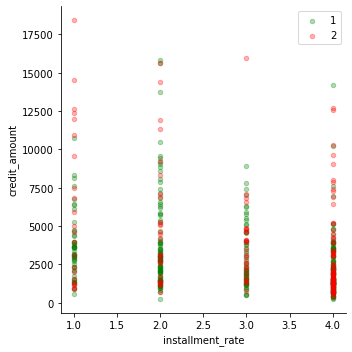

In [106]:
sns.lmplot( x="installment_rate", y="credit_amount", data=X_train, fit_reg=False, hue='customer_type', 
           legend=False, palette=["green", "red"], 
          scatter_kws={"alpha":0.3,"s":20})
plt.legend(loc='upper right')
plt.show()

Z powyższego wykresu widać, że jeśli kwota raty stanowi więcej procent przychodu (w szczególności 4%) to więcej jest klientów złych niż dobrych, ponieważ na wykresie dominuje kolor czerwony. 

##### Jak ma się do siebie płeć oraz stan cywilny do celu w jakim brany jest kredyt?

In [102]:
good = X_train[X_train.customer_type == 1]
good = good.groupby(['personal', 'purpose']).size().reset_index(name='counts')
#good.pivot(index='purpose', columns='personal', values='counts')
#good = pd.pivot_table(good, index='personal', columns='purpose', values='counts').reset_index()
#good.replace(np.nan, 0)
fig1 = px.bar(good, x="personal", y="counts", color="purpose", barmode = 'stack', color_discrete_sequence=px.colors.sequential.Plasma, 
              title = "Good customers", range_y = (0, 200))
fig1.show()

bad = X_train[X_train.customer_type == 2]
bad = bad.groupby(['personal', 'purpose']).size().reset_index(name='counts')
fig2 = px.bar(bad, x="personal", y="counts", color="purpose", barmode = 'stack', color_discrete_sequence=px.colors.sequential.Plasma, 
              title = "Bad customers", range_y = (0, 200))
fig2.show()

Dla przypomnienia co oznaczają poszczególne oznaczenia:

***personal:***
*    A91 - male: divorced/separated;
*    A92 - female: divorced/separated/married; 
*    A93 - male: single;
*    A94 - male: married/widowed
    
***purpose:***    
* A40 : car (new),
* A41 : car (used), 
* A42 : furniture/equipment, 
* A43 : radio/television, 
* A44 : domestic appliances, 
* A45 : repairs, 
* A46 : education, 
* A47 : (vacation - does not exist?), 
* A48 : retraining, 
* A49 : business, 
* A410 : others

Z powyższych wykresów wydaje się, że całkiem dużą częścią złych klientów są samotni mężczyźni oraz kobiety, którzy biorą kredyt na nowy samochód. Jest to ogólnei dość popularny cel, jednak w przypadku klientów dobrych, nie aż tak dominujący procentowo. 
Wygląda też na to, że jeśli  klient bierze kredyt na radio lub telewizję to jest większa szansa, że okaże się dobrym klientem, ponieważ procentowo wśród celów, na które jest brany kredyt u dobrych klientów jest dużo właśnie na ten cel, a u złych klientów ten odsetek jest mniejszy. 

Poza tym można zauważyć, że największą grupą kredytobiorców są samotni mężczyźni. Co ciekawe, liczba mężczyzn rozwiedzionych lub w separacji jako klientów dobrych oraz jako klientów złych jest zbliżona i wynosi około 15. Wskazuje to na to, że potencjalnie oni mają największe szanse bycia złymi klientami, ponieważ dla innych grup stosunek klientów dobrych do złych jest dużo większy, wnioskując z wykresu wynosi około 2:1.

##### Wielkość kredytu a posiadanie oszczędności

Text(0.5, 1.0, 'Wielkość kredytu a posiadane oszczędności')

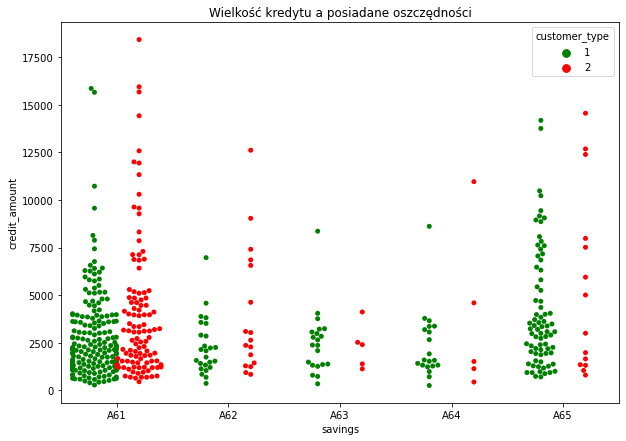

In [115]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='savings',y="credit_amount",data=X_train, hue='customer_type', dodge=True, palette=["green", "red"], 
             order=['A61','A62','A63', 'A64', 'A65'])
plt.title("Wielkość kredytu a posiadane oszczędności")

Dla przypomnienia co onaczają oznaczenia:
* A61: < 100 DM,
* A62: 100 <= x < 500 DM,
* A63: 500 <= x < 1000 DM, 
* A64 : >= 1000 DM, 
* A65 : unknown/ no savings account

Z wykresu widać, że najwięcej osób bierze kredyt w przypadku kiedy mają niewielkie oszczędności. W przypadków klientów, którzy mają zaoszczędzone więcej niż 500 DM jest mniejszy odsetek złych klientów w porównaniu do klientów, którzy mają niewielkie oszczczędności.  

#### Czy osoba która w przeszłości brała już kredyt jest lepszym klientem?

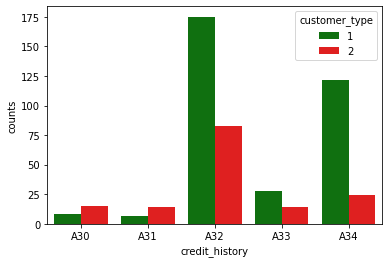

In [118]:
df = X_train.groupby(['credit_history', 'customer_type']).size().reset_index(name='counts')
sns.barplot(x="credit_history", y="counts", hue="customer_type", data=df, ci=None, palette=["green", "red"]);

* A30: no credits taken/ all credits paid back duly, 
* A31: all credits at this bank paid back duly, 
* A32: existing credits paid back duly till now, 
* A33: delay in paying off in the past, 
* A34 : critical account/ other credits existing (not at this bank)

Z powyższego wykresu wynika, że jeśli osoba nie brała kredytów lub wcześniej spłaciła kredyty na czas to większa sznasa, że jest to zły klient niż dobry. W przypadku osób które do tej pory spłacały na czas oraz osób które miały pewne opóźnienia przeważają dobrzy klienci. 

##### Czy osoby, które mają stałą pracę lepiej spłacają kredyt?

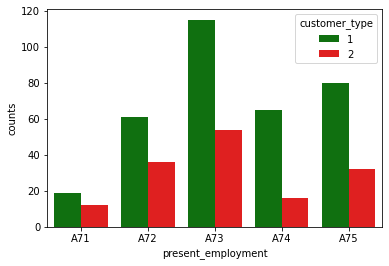

In [119]:
df2 = X_train.groupby(['present_employment', 'customer_type']).size().reset_index(name='counts')
sns.barplot(x="present_employment", y="counts", hue="customer_type", data=df2, ci=None, palette=["green", "red"]);

* A71 : unemployed, 
* A72 : < 1 year,  
* A73 : 1 <= x < 4 years,
* A74 : 4 <= x < 7 years, 
* A75 : .. >= 7 years

Widać, że w tym przypadku dla każdej grupy większość klientów jest dobra, więc nie można wysunąć jasnych wniosków. Widać jednak tendencję, że wśród osób zatrudnionych w obecnym miejscu pracy przez 4-7 lat dobrych klientów jest ponad 3-krotnie więcej niż złych. 

In [139]:
############dalje nie patrz, jeszcze coś wymysle jednego

In [ ]:
df3 = X_train.groupby(['present_residence', 'property']).size().reset_index(name='counts')
hm9 = HeatMap(df3, y='property', x='present_residence', values='counts', stat=None)
show(vplot(hm9))

In [138]:
df3 = X_train.groupby(['present_residence', 'property']).size().reset_index(name='counts')
p = figure(title="title", width=900, height=400)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0

p.rect(x='property', y="present_residence", width=1, height=1,
       source=df3,
       fill_color={'field': 'rate'},
       line_color=None)


show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "rate" [renderer: GlyphRenderer(id='1191', ...)]


In [125]:
df3 = X_train.groupby(['present_residence', 'property']).size().reset_index(name='counts')
#sns.heatmap(df3)
df3

,present_residence,property,counts
0,1.0,A121,22
1,1.0,A122,14
2,1.0,A123,16
3,1.0,A124,7
4,2.0,A121,48
5,2.0,A122,42
6,2.0,A123,61
7,2.0,A124,7
8,3.0,A121,23
9,3.0,A122,16


### Raport wygenerowany automatycznie

Wygenerowaliśmy także raport korzystając z narzędzia do automatycznej eksploracji danych, pakietu pandas_profiling w następujący sposób:

In [ ]:
# import pandas_profiling
# profile = X_train.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="X_train_pandas_profiling.html")

Raport został dołączony jako plik .html